<a href="https://colab.research.google.com/github/KMMohiuddin/DATA_SCIENCE_Projects/blob/main/play_with_MINST_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

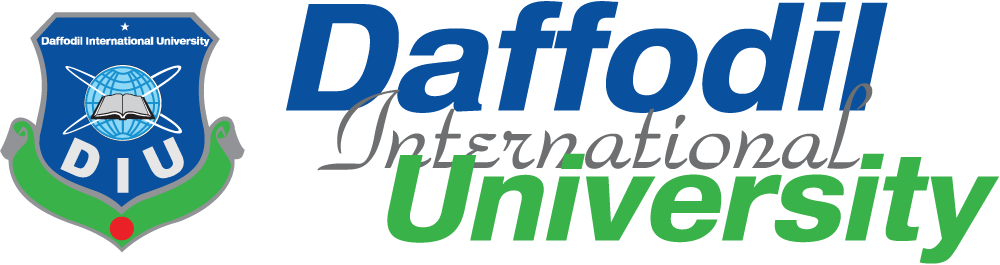


</br>
</br>

# LAB REPORT 

---

### <B> Machine Learning Driven Data Analysis II and Communicating Data Insights Lab </B> 
`Course Code: DS424`
</br>

</br>
</br>

<u> Submitted By: </u>
#### K. M. Mohiuddin
ID: 192-35-2894





CLASSIFYING DIGITS
---

In [1]:
# Import the necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# I. Download the MNIST Digits dataset using TensorFlow Datasets API
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
# II. Explore the datasets
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)
print("Data type:", train_images.dtype)


Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)
Data type: uint8


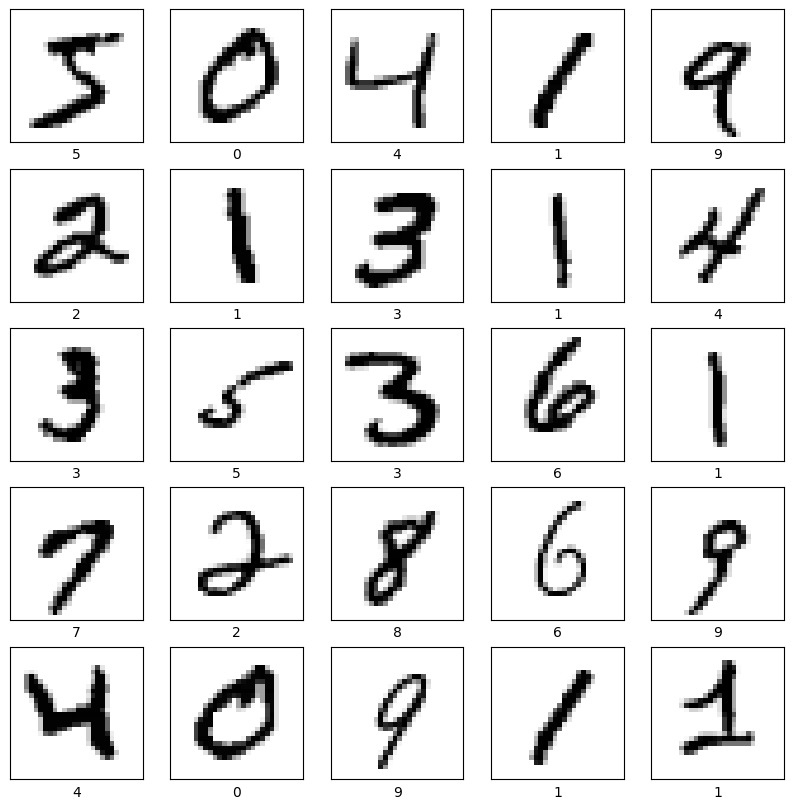

In [4]:

# III. Visualize sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()


In [5]:

# IV. Load the data into DataLoader
# Not applicable for MNIST as it is already in memory

# V. Preprocess the dataset
# Splitting the training data into training and validation sets
validation_split = 0.2
split_index = int(len(train_images) * (1 - validation_split))
x_train, x_val = train_images[:split_index], train_images[split_index:]
y_train, y_val = train_labels[:split_index], train_labels[split_index:]

# Scaling and normalizing the pixel values to the range [0, 1]
x_train = x_train / 255.0
x_val = x_val / 255.0
test_images = test_images / 255.0


In [6]:

# VI. Develop an Artificial Neural Network and a Convolutional Neural Network architecture
# Artificial Neural Network (ANN)
ann_model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Convolutional Neural Network (CNN)
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [ ]:
# VII. Hyperparameter tuning and model selection
# Define hyperparameters to search
hyperparameters = {
    'optimizer': ['adam', 'sgd'],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Perform hyperparameter tuning using cross-validation
ann_scores = cross_val_score(ann_model, x_train, y_train, cv=3, scoring='accuracy')
cnn_scores = cross_val_score(cnn_model, np.expand_dims(x_train, axis=-1), y_train, cv=3, scoring='accuracy')

# Select the best model based on cross-validation scores
best_ann_model = ann_model if np.mean(ann_scores) > np.mean(cnn_scores) else cnn_model


In [ ]:

# VIII. Evaluate training performance
# Confusion matrix and metrics for ANN
y_train_pred = best_ann_model.predict_classes(x_train)
ann_confusion_matrix = tf.math.confusion_matrix(y_train, y_train_pred)
ann_accuracy = accuracy_score(y_train, y_train_pred)
ann_precision = precision_score(y_train, y_train_pred, average='weighted')
ann_recall = recall_score(y_train, y_train_pred, average='weighted')
ann_f1_score = f1_score(y_train, y_train_pred, average='weighted')

# Confusion matrix and metrics for CNN
y_train_pred = best_ann_model.predict_classes(np.expand_dims(x_train, axis=-1))
cnn_confusion_matrix = tf.math.confusion_matrix(y_train, y_train_pred)
cnn_accuracy = accuracy_score(y_train, y_train_pred)
cnn_precision = precision_score(y_train, y_train_pred, average='weighted')
cnn_recall = recall_score(y_train, y_train_pred, average='weighted')
cnn_f1_score = f1_score(y_train, y_train_pred, average='weighted')


In [ ]:

# IX. Evaluate results on test data using bootstrapping
n_iterations = 1000
test_scores = []

for _ in range(n_iterations):
    x_train_resampled, y_train_resampled = resample(x_train, y_train)
    best_ann_model.fit(x_train_resampled, y_train_resampled)
    y_test_pred = best_ann_model.predict_classes(test_images)
    test_accuracy = accuracy_score(test_labels, y_test_pred)
    test_scores.append(test_accuracy)

# Calculate 95% confidence interval
confidence_interval = np.percentile(test_scores, [2.5, 97.5])


In [ ]:
# X. Compare training and test results and select the best model
# Compare accuracy and check for overfitting or underfitting
train_accuracy = best_ann_model.evaluate(x_train, y_train, verbose=0)[1]
test_accuracy = np.mean(test_scores)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Confidence Interval (95%):", confidence_interval)

PREDICTING HOUSE PRICE
---


Load the data into a DataFrame and explore the dataset:

In [20]:
import pandas as pd


df = pd.read_csv("AB_NYC_2019.csv")
print(df.head(5))
print("Shape:", df.shape)
print("Data types:")
print(df.dtypes)
print("Columns:", df.columns)


     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

 Visualize sample data using various plots:

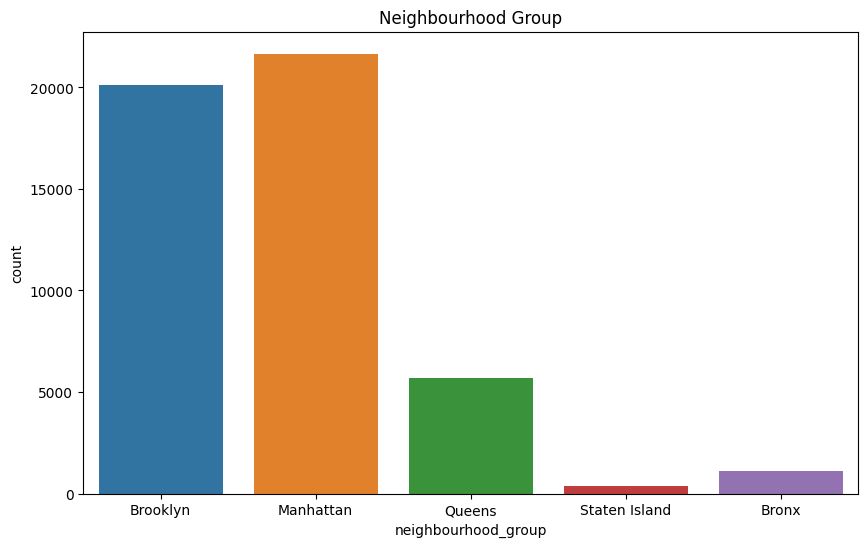

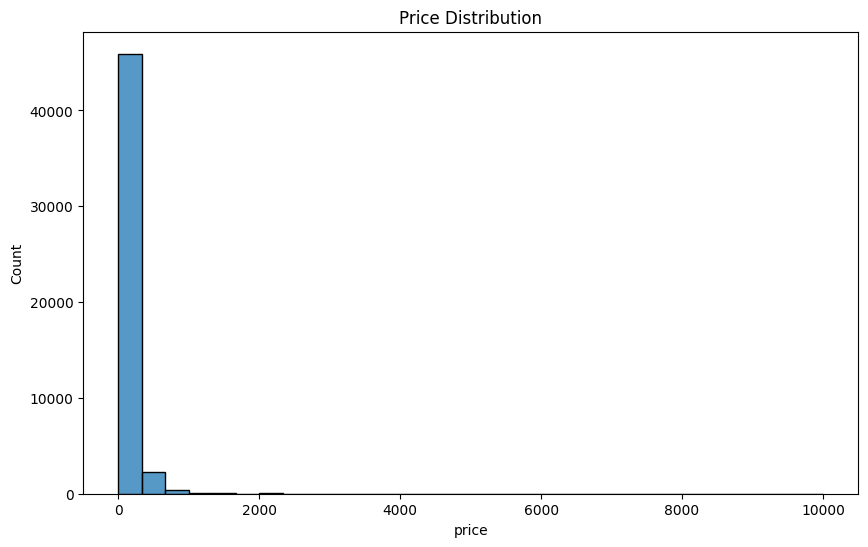

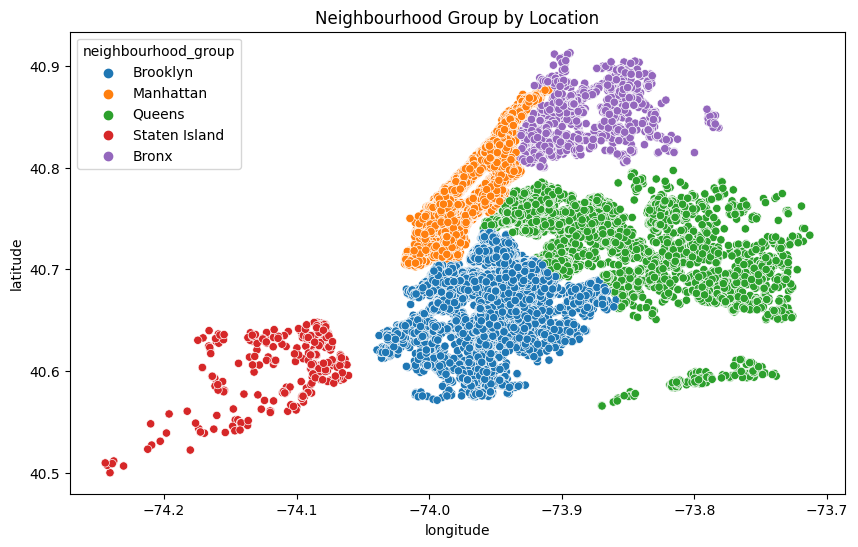

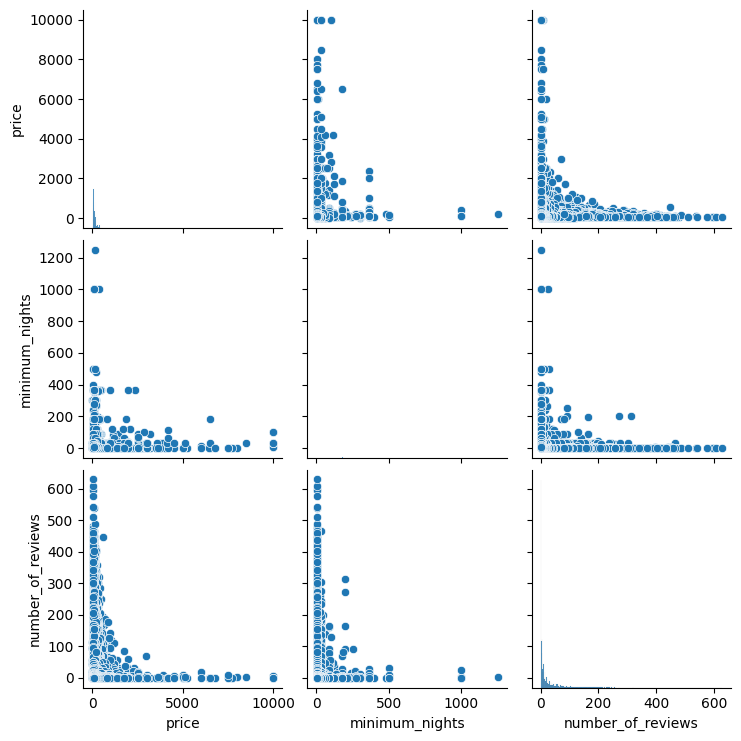

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate bar chart
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='neighbourhood_group')
plt.title('Neighbourhood Group')
plt.show()

# Generate histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', bins=30)
plt.title('Price Distribution')
plt.show()

# Generate scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group')
plt.title('Neighbourhood Group by Location')
plt.show()

# Generate pair plot
sns.pairplot(data=df[['price', 'minimum_nights', 'number_of_reviews']])
plt.show()


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('price' , axis =1)
y = df['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



X_train shape: (39116, 15)
y_train shape: (39116,)
X_test shape: (9779, 15)
y_test shape: (9779,)


In [28]:
# Preprocess the data
df = df[['neighbourhood_group', 'room_type', 'latitude', 'longitude', 'price']]
df = pd.get_dummies(df, columns=['neighbourhood_group', 'room_type'], prefix=['ng', 'rt'])
df['price'] = np.log1p(df['price'])  # Apply log transformation to target variable

# Split the data into train and test sets
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Check the shapes of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train shape: (39116, 10)
y_train shape: (39116,)
X_test shape: (9779, 10)
y_test shape: (9779,)


Develop an Artificial Neural Network architecture:

In [29]:

def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

Hyperparameter tuning using KerasRegressor and cross-validation


In [31]:
from keras.wrappers.scikit_learn import KerasRegressor
model = KerasRegressor(build_fn=create_model, epochs=10, batch_size=32, verbose=0)
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')



<ipython-input-31-83e876f83667>:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, epochs=10, batch_size=32, verbose=0)


Evaluate training performance using cross-validation


In [32]:
mse_scores = -cv_scores
mae_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
rmse_scores = np.sqrt(mse_scores)
avg_mse = mse_scores.mean()
avg_mae = mae_scores.mean()
avg_rmse = rmse_scores.mean()


In [33]:
print(f'Average MSE: {avg_mse:.3f}')
print(f'Average MAE: {avg_mae:.3f}')
print(f'Average RMSE: {avg_rmse:.3f}')

Average MSE: 0.250
Average MAE: -0.355
Average RMSE: 0.500


Evaluate results on test data using bootstrapping


In [ ]:

create_model()

n_iterations = 1000
n_size = int(len(X_test_scaled) * 0.50)
bootstrap_scores = []

for _ in range(n_iterations):
    # Create a bootstrap sample
    X_bs, y_bs = resample(X_test_scaled, y_test, n_samples=n_size)
    y_pred = model.predict(X_bs)
    bootstrap_scores.append(mean_squared_error(y_bs, y_pred))

# Compute average accuracy/precision/recall and 95% confidence interval
avg_mse_bs = np.mean(bootstrap_scores)
ci_mse_bs = np.percentile(bootstrap_scores, [2.5, 97.5])

print(f'Average MSE (Bootstrap): {avg_mse_bs:.3f}')
print(f'95% CI MSE (Bootstrap): {ci_mse_bs}')


Compare training and test results

In [ ]:

train_predictions = model.predict(X_train_scaled)
test_predictions = model.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, train_predictions)
train_mae = mean_absolute_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)

test_mse = mean_squared_error(y_test, test_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)

print('Training Metrics:')
print(f'Train MSE: {train_mse:.3f}')
print(f'Train MAE: {train_mae:.3f}')
print(f'Train RMSE: {train_rmse:.3f}')

print('\nTesting Metrics:')
print(f'Test MSE: {test_mse:.3f}')
print(f'Test MAE: {test_mae:.3f}')
print(f'Test RMSE: {test_rmse:.3f}')